In [12]:
import numpy as np
import numpy.random as rnd
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

np.random.seed(42)

In [13]:
poly_dataset = pd.read_csv('../../Data/reg_analysis_poly_set.csv')

In [14]:
poly_dataset.shape

(100, 2)

In [15]:
X = poly_dataset['input_feature'].values.reshape(-1,1)
y= poly_dataset['output_feature'].values.reshape(-1,1)

In [16]:
poly_dataset.columns

Index(['input_feature', 'output_feature'], dtype='object')

In [17]:
print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


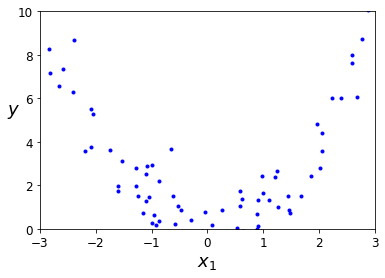

In [18]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

#### PolynomialFeatures( degree = d) transforms an array containing n features into an array containing (n+d)!/n!d! features.

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly_features.fit_transform(X)
X_poly.shape

(100, 3)

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

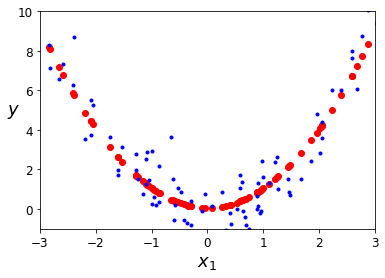

In [10]:
y_pred = lin_reg.predict(X_poly)
plt.plot(X, y, "b.")
plt.scatter(X, y_pred, c='r')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, -1, 10])
plt.show()

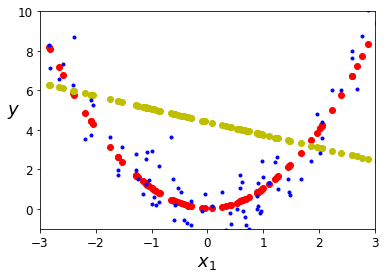

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("r", 2, 2), ("y", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    lin_reg = LinearRegression()
    
    polynomial_regression = Pipeline(steps=[("poly_features", polybig_features),
                                            ("lin_reg", lin_reg)] )
    
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X)
    plt.scatter(X, y_newbig, c=style)

plt.plot(X, y, "b.", linewidth=3)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, -1, 10])
plt.show()